<a href="https://colab.research.google.com/github/Poseidon4006/coding_ninja_ML101/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import sklearn


In [88]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [89]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [90]:
import numpy as np 

np.random.seed(64)
m = 100 # number of training examples
X = 2 * np.random.rand(m,1) # column vector( uniform distribution)
y = 4 + 3 * X + np.random.randn(m, 1) # column vector (standard normal distribution)

In [91]:
X.shape

(100, 1)

In [92]:
max(y)

array([10.43413462])

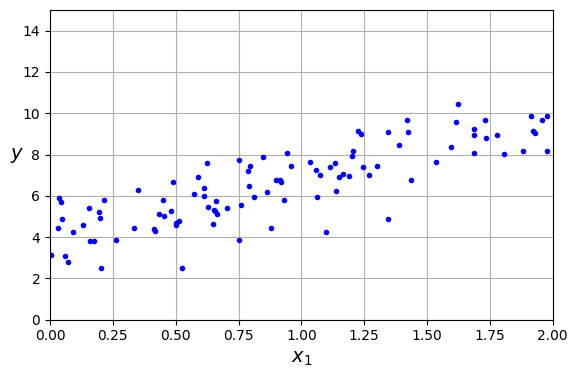

In [93]:
# generate the plot for training instances
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [94]:
# prepairing the given instances 
X_b = np.c_[np.ones((m,1)), X] # adding dummy features 


# Gradient Descent
### Batch Gradient Descent

In [95]:
alpha = 0.1 # learning rate
n_epochs = 1000 # what is an epoch?
m = len(X_b)    # number of training examples or instances

np.random.seed(64)
theta = np.random.randn(2,1)  # randomly initialized model parameters theta0 and theta1 

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - alpha * gradients 

In [96]:
theta # The parameters we got from running the Gradient descent 1000 times (theta)

array([[3.96705144],
       [2.82407033]])

In [97]:
# predicting the new set X_new on our new found parameters in theta
# our test set to draw the model (line)
from sklearn.preprocessing import add_dummy_feature
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta
y_predict

array([[3.96705144],
       [9.61519211]])

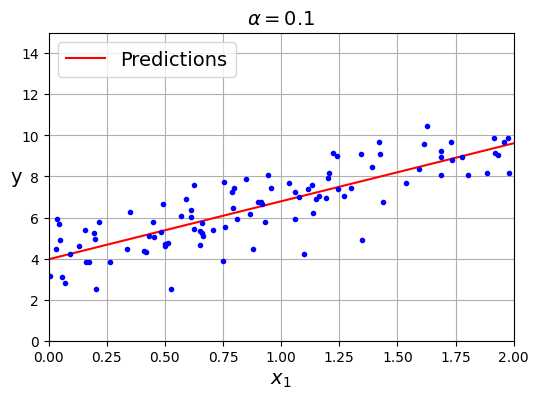

In [107]:
# Plot the prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.title(fr"$\alpha = 0.1$")

plt.legend(loc="upper left")
# save_fig("linear_model_predictions_plot_using_gradient_descent_alpha0.1")

plt.show()

Ploting different plots for different learning rates alpha = 0.03, 0.1, 0.3

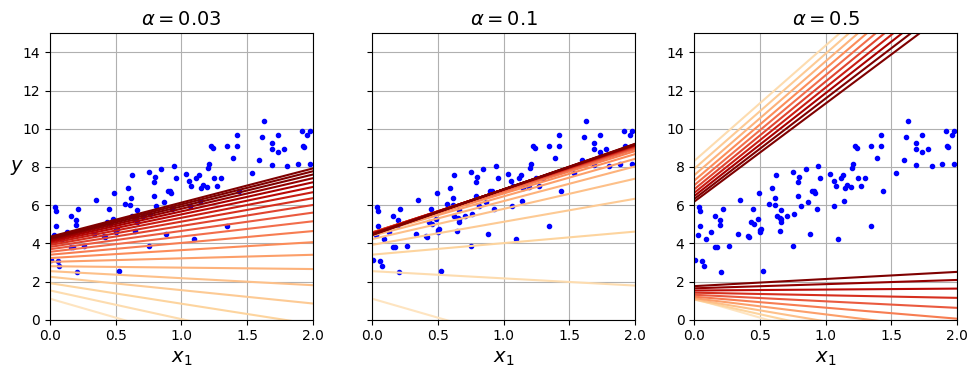

In [99]:
import matplotlib as mpl

def plot_gradient_descent(theta, alpha):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_epochs = 1000
  n_show = 20
  theta_computed = []
  for epoch in range(n_epochs):
    if epoch < n_show:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_show + 0.15))
      plt.plot(X_new,y_predict, linestyle="solid", color=color)
    gradients = 2 / m * X_b.T @ (X_b @ theta -y)
    theta = theta - alpha * gradients
    theta_computed.append(theta)
  plt.xlabel("$x_1$")
  plt.axis([0, 2, 0,15])
  plt.grid()
  plt.title(fr"$\alpha = {alpha}$")
  return theta_computed

np.random.seed(64)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))

plt.subplot(131)
plot_gradient_descent(theta, alpha=0.03)
plt.ylabel("$y$", rotation=0)

plt.subplot(132)
plot_gradient_descent(theta,0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plot_gradient_descent(theta,0.5)
save_fig("gradient_descent_plot")
plt.show()